In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../data/btc_price_30d.csv")
print(df.head())

                  date          price
0  2025-07-07 00:00:00  109215.197718
1  2025-07-08 00:00:00  108300.716758
2  2025-07-09 00:00:00  108953.191877
3  2025-07-10 00:00:00  111327.530542
4  2025-07-11 00:00:00  115879.650301


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   price   31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 628.0+ bytes


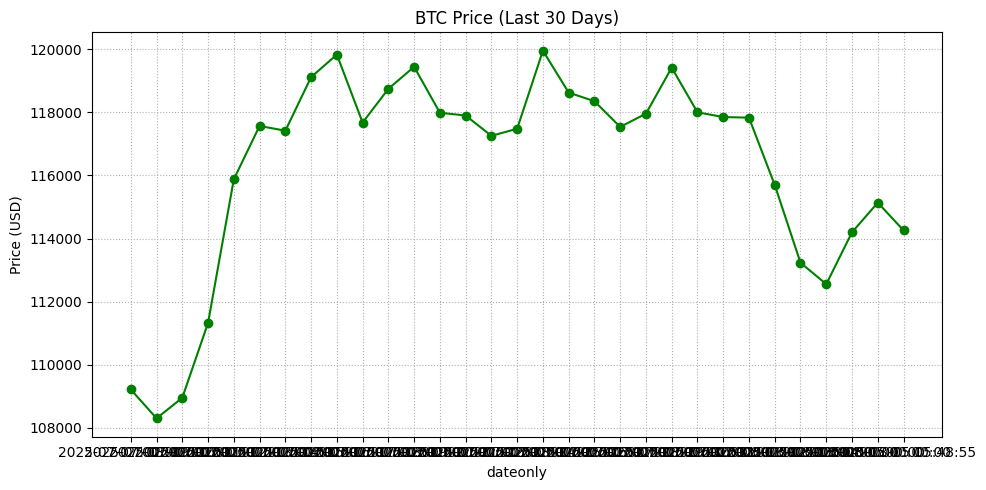

In [14]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['price'], marker='o',color = 'green')
plt.title("BTC Price (Last 30 Days)")
plt.xlabel("dateonly")
plt.ylabel("Price (USD)")
plt.grid(linestyle = ':')

plt.tight_layout()
plt.show()

In [15]:
#convert DateTime format into date format

date_format = df['date_only'] = df['date'].dt.date
print(date_format)

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
# Day 3 

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/btc_price_30d.csv")
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)
df.head()


,price
date,
2025-07-07,109215.197718
2025-07-08,108300.716758
2025-07-09,108953.191877
2025-07-10,111327.530542
2025-07-11,115879.650301


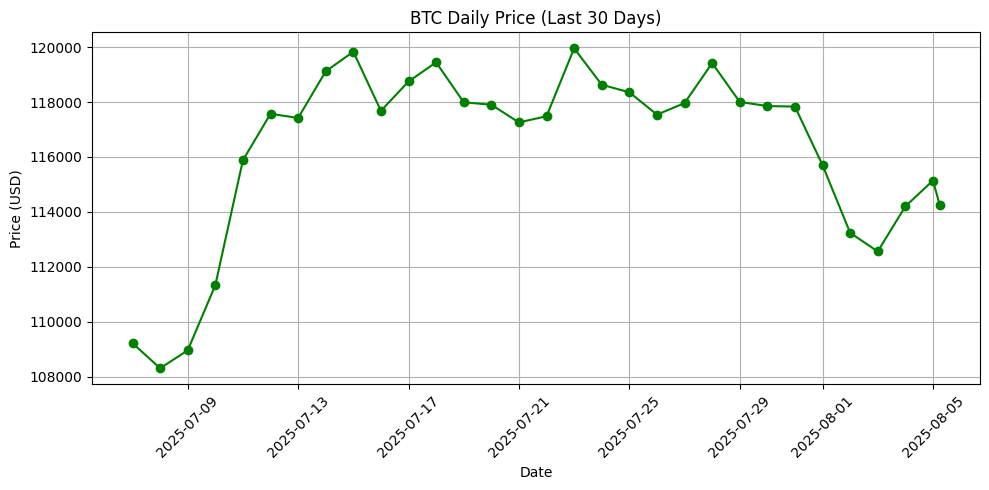

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['price'], color='green', marker='o')
plt.title("BTC Daily Price (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


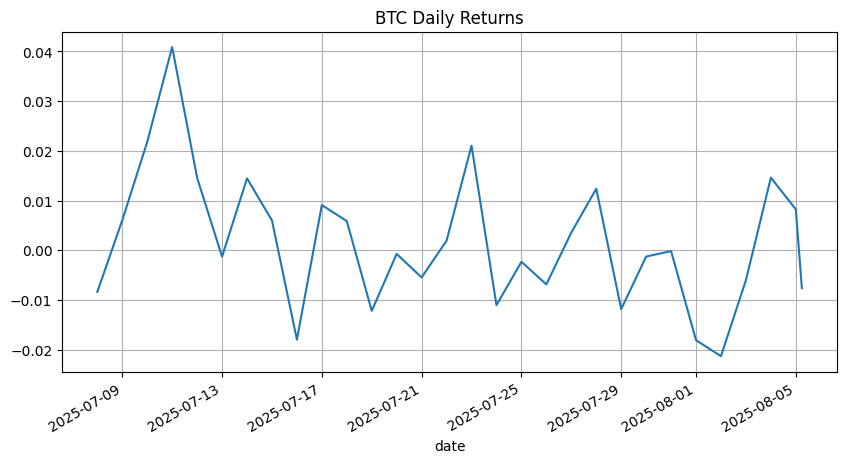

,price,daily_return
date,,
2025-07-07,109215.197718,NaN
2025-07-08,108300.716758,-0.008373
2025-07-09,108953.191877,0.006025
2025-07-10,111327.530542,0.021792
2025-07-11,115879.650301,0.040889


In [18]:
df['daily_return'] = df['price'].pct_change()  # percentage change
df['daily_return'].plot(figsize=(10,5), title="BTC Daily Returns")
plt.grid(True)
plt.show()

df.head()

In [35]:
# Add moving averages and volatility metrics:

# Moving averages
df['ma_7'] = df['price'].rolling(window=2).mean()
df['ma_14'] = df['price'].rolling(window=14).mean()

# Volatility (rolling std dev)
df['volatility'] = df['daily_return'].rolling(window=7).std()

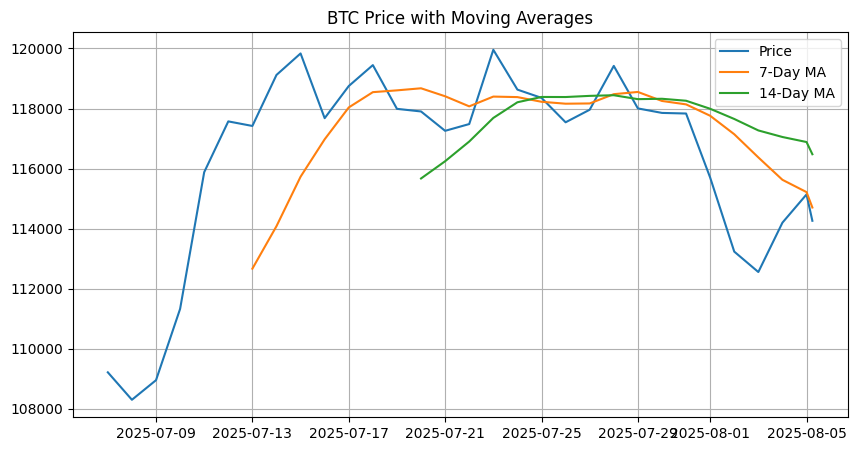

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(df['price'], label='Price')
plt.plot(df['ma_7'], label='7-Day MA')
plt.plot(df['ma_14'], label='14-Day MA')
plt.title("BTC Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
df_model = df.dropna().copy()
df_model.tail()



,price,daily_return,ma_7,ma_14,volatility
date,,,,,
2025-08-02 00:00:00,113234.605134,-0.021309,117143.273685,117651.716292,0.012224
2025-08-03 00:00:00,112554.902322,-0.006003,116371.182253,117269.807418,0.011592
2025-08-04 00:00:00,114199.109665,0.014608,115625.495912,117051.392335,0.012217
2025-08-05 00:00:00,115138.686131,0.008228,115216.265071,116883.979217,0.013027
2025-08-05 05:48:55,114261.055889,-0.007622,114703.086066,116477.212088,0.013072


date
2025-07-07 00:00:00              NaN
2025-07-08 00:00:00              NaN
2025-07-09 00:00:00              NaN
2025-07-10 00:00:00              NaN
2025-07-11 00:00:00              NaN
2025-07-12 00:00:00              NaN
2025-07-13 00:00:00    112666.609964
2025-07-14 00:00:00    114081.232670
2025-07-15 00:00:00    115728.798057
2025-07-16 00:00:00    116975.227065
2025-07-17 00:00:00    118035.317379
2025-07-18 00:00:00    118544.705222
2025-07-19 00:00:00    118604.408300
2025-07-20 00:00:00    118673.361030
2025-07-21 00:00:00    118407.555910
2025-07-22 00:00:00    118071.669526
2025-07-23 00:00:00    118397.041064
2025-07-24 00:00:00    118380.025799
2025-07-25 00:00:00    118224.178652
2025-07-26 00:00:00    118160.158899
2025-07-27 00:00:00    118168.432582
2025-07-28 00:00:00    118477.288758
2025-07-29 00:00:00    118551.693363
2025-07-30 00:00:00    118251.338109
2025-07-31 00:00:00    118137.650252
2025-08-01 00:00:00    117758.445576
2025-08-02 00:00:00    117143.273

,price,daily_return,ma_7,ma_14,volatility
date,,,,,
2025-07-07,109215.197718,NaN,NaN,NaN,NaN
2025-07-08,108300.716758,-0.008373,NaN,NaN,NaN
2025-07-09,108953.191877,0.006025,NaN,NaN,NaN
2025-07-10,111327.530542,0.021792,NaN,NaN,NaN
2025-07-11,115879.650301,0.040889,NaN,NaN,NaN
2025-07-12,117571.025100,0.014596,NaN,NaN,NaN
2025-07-13,117418.957450,-0.001293,112666.609964,NaN,NaN
2025-07-14,119117.556663,0.014466,114081.232670,NaN,0.016168
2025-07-15,119833.674467,0.006012,115728.798057,NaN,0.013801
